In [1]:
import scanpy as sc
import infercnvpy as cnv

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
adata = cnv.datasets.oligodendroglioma()

In [11]:
cnv.tl.infercnv(
    adata,
    reference_key="cell_type",
    reference_cat=["Oligodendrocytes (non-malignant)", "Microglia/Macrophage"],
    window_size=101,
    step=1,
    n_jobs=1,
)

  0%|          | 0/1 [00:00<?, ?it/s]

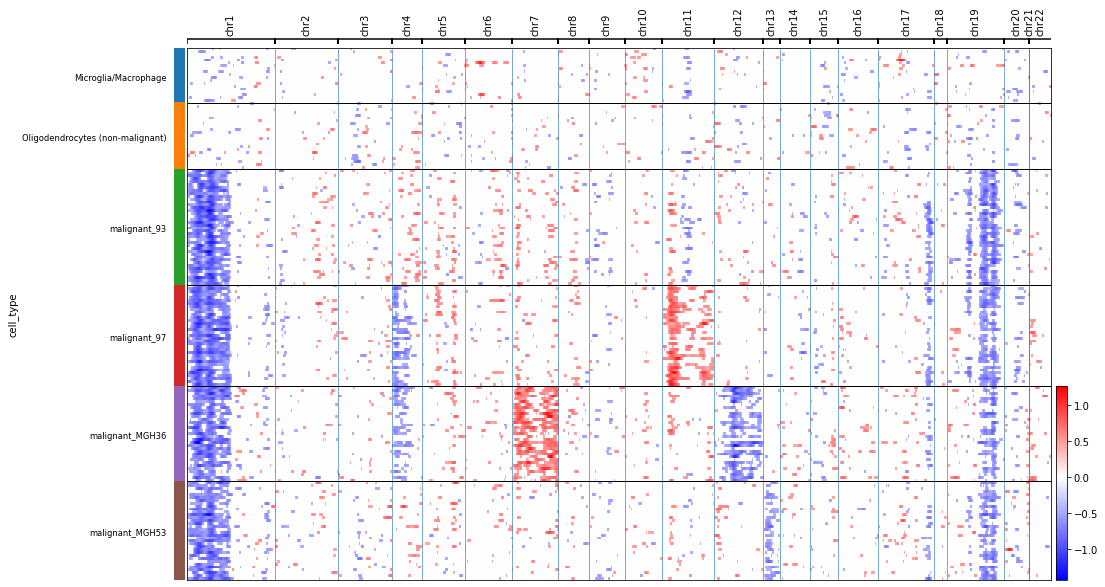

In [12]:
cnv.pl.chromosome_heatmap(adata, use_rep='cnv', groupby="cell_type")

In [13]:
adata.obsm['X_cnv'] = adata.obsm['X_cnv'].toarray()

In [15]:
adata.obsm['X_cnv'].std()

0.21294190835783222

In [28]:
cnv.tl.hmm_denoising(
    adata=adata,
    reference_key='cell_type',
    reference_cat=["Oligodendrocytes (non-malignant)", "Microglia/Macrophage"],
    subclone_key='cell_type',
    key_used = 'cnv',
    key_added = 'hmm_iters',
    iterations=10,
)

(True,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 {'Microglia/Macrophage': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  'Oligodendrocytes (non-malignant)': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 0 stored elements in Compressed Sparse Row format>,
  'malignant_93': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 747 stored elements in Compressed Sparse Row format>,
  'malignant_97': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 1121 stored elements in Compressed Sparse Row format>,
  'malignant_MGH36': <1x9013 sparse matrix of type '<class 'numpy.int32'>'
  	with 1584 stored elements in Compressed Sparse Row format>,
  'malignant_MGH53': <1x9013 sparse matrix of type '<class 'numpy.in

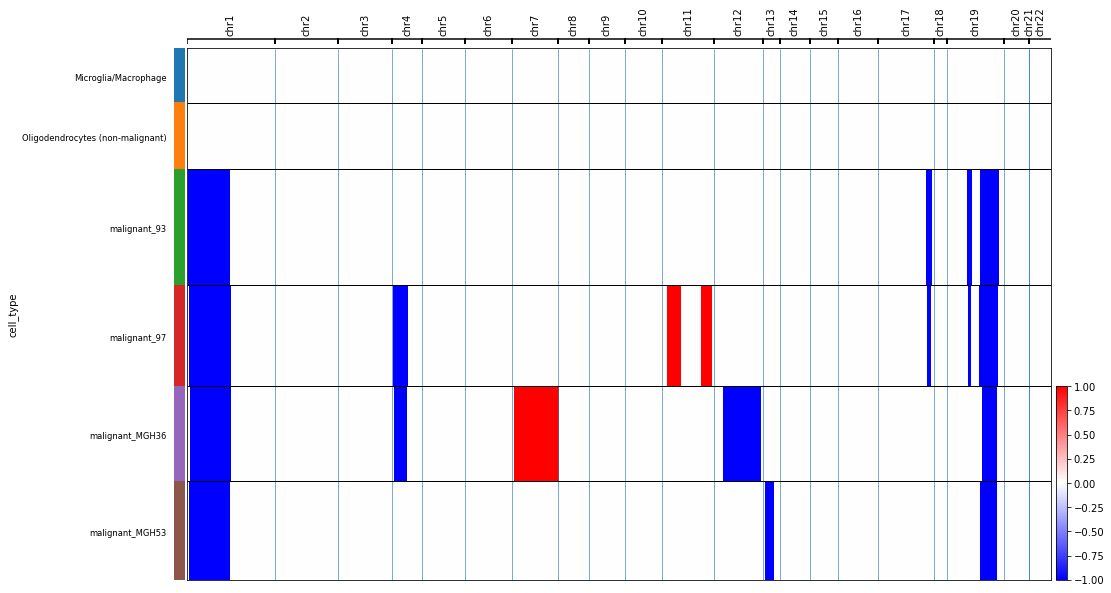

In [29]:
cnv.pl.chromosome_heatmap(adata, use_rep='hmm_iters', groupby="cell_type")

In [17]:
adata.obs

,cell_type
cell_id,
MGH54_P2_C12,Microglia/Macrophage
MGH36_P6_F03,Microglia/Macrophage
MGH53_P4_H08,Microglia/Macrophage
MGH53_P2_E09,Microglia/Macrophage
MGH36_P5_E12,Microglia/Macrophage
...,...
93_P10_D04,malignant_93
93_P8_G09,malignant_93
93_P10_B10,malignant_93


In [18]:
adata_nonmalignant_subset = adata[adata.obs['cell_type'] == 'malignant_93']

In [27]:

def std_helper(A) -> float:
    """
    Compute the standard deviation of a matrix or sparse matrix

    Args:
        A: matrix or sparse matrix

    Returns:
        float: standard deviation
    """
    if issparse(A):
        return np.sqrt((A.power(2)).mean() - A.mean()**2)
    else:
        try:
            return A.std()
        except Exception as e:
            raise Exception('Unknown type', type(A))

In [25]:
adata_nonmalignant_subset.obsm['X_cnv']

ArrayView([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ],
           [ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ],
           [ 0.        ,  0.        , -0.42600392, ...,  0.        ,
             0.        ,  0.        ],
           ...,
           [ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ],
           [ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ],
           [ 0.        ,  0.        ,  0.        , ...,  0.        ,
             0.        ,  0.        ]])